# Template for Topic Modelling

### Definition of Custom Transformers for the Selection of Target Data 

In [1]:
# Import scikit-learn classes for custom transformers
from sklearn.base import TransformerMixin


# FactorExtraction: Custom transformer for the extraction of a series from a pandas df
# Input: Data as df, by default the first column extracted
# Output: Series of messages/ or sentences

class FactorExtractor(TransformerMixin):
 
    
    def __init__(self):
        self.data = None
        
        
    def transform(self, X, y = None): 
        import pandas as pd
        import numpy as np 

        data = X.iloc[:,0]
        self.data = data
        return data
        
        
    def fit(self,X):
        return self
    

### Definition of Custom Transformers for Preprocessing Steps (not included in scikit-learn)

In [2]:
# Import scikit-learn classes for custom transformers
from sklearn.base import TransformerMixin


# TOKENIZATION: Custom transformer for tokenization based on Gensim Simple Preprocess
# Input: List of lists containing the corpus with documents from the message exchanges as entries
# Output: List of lists containing the corpus with tokens for each document

class WordTokenizer(TransformerMixin):
    
    
    def __init__(self):
        self.token = []
    
    
    def transform(self, X, y = None):
        from gensim.utils import simple_preprocess
        token_list = []
        
        for text in X:
            token_list.append(simple_preprocess(text))

        self.token = token_list
        return token_list
 

    def fit(self,X):
        return self


    
# STOPWORD REMOVAL: custom transformer for stopword removal based on NLTK stopwords
# Input: List of lists containing the corpus with tokens for each document
# Output: List of lists containing the corpus with tokens for each document without stopwords.
# Note: Comment out the stopword list extension or NER if required.

class StopwordRemover(TransformerMixin):
    

    def __init__(self, stopwords=[], named_entity_recognition=[], NLTK_stopwords = 'include'):
        self.stopword = stopwords
        self.vocab = []
        self.NLTK_stopwords = NLTK_stopwords
        self.named_entity_recognition = named_entity_recognition
    
    
    def transform(self, X, y = None):
        from nltk.corpus import stopwords
        import nltk
        
        # Setting stopword list
        if self.NLTK_stopwords == 'include':
            stopword_list = stopwords.words('english')
            
        elif self.NLTK_stopwords =='exclude':
            stopword_list = []
        
        else:
            raise ValueError ("NLTK_stopwords parameter received no valid value.")
        
        # Adding named_entity_recognition words to stopword dict for removal (optional)
        for word in self.named_entity_recognition:
            if word not in stopword_list:
                stopword_list.append(word)
        
        for word in self.stopword:
            if word not in stopword_list:
                stopword_list.append(word)
        
        self.stopword = stopword_list
        
         
        # Executing stopword removal
        i = 0
        vocab_list = []
    
        while i <= len(X) - 1:
            vocab = [] 
            for token in X[i]:
                if token not in self.stopword: 
                    vocab.append(token)
            vocab_list.append(vocab)
            i += 1
        
        self.vocab = vocab_list
        return vocab_list  
    
    
    def fit(self,X):
        return self      
    
    
    
# LEMMATIZATION: Custom transformer class for lemmatization based on NLTK WordNetLemmatizer
# Input: List of lists containing the corpus with tokens for each document
# Output: List of lists containing the corpus with lemmas of the tokens for each document.

class Lemmatizer(TransformerMixin):
    
    
    def __init__(self):
        self.lemmas = []
    
    
    def transform(self,X, y = None): 
        from nltk.stem import WordNetLemmatizer
    
        lemmatizer = WordNetLemmatizer() 
        i = 0
        lemmas_list = []
        
        while i <= len(X) - 1:
            lemmas = []        
            for token in X[i]:
                lemmas.append(lemmatizer.lemmatize(token))
            lemmas_list.append(lemmas)
            i += 1
        
        self.lemmas = lemmas_list
        return lemmas_list   
    
    
    def fit(self,X):
        return self


    
# STEMMING: Custom transformer class for stemming based on NLTK's Porter Stemmer.
# Input: List of lists containing the corpus with tokens for each document
# Output: List of lists containing the corpus with the word stemms of the tokens for each document.

class Stemmer(TransformerMixin):  
    
    
    def __init__(self):
        self.stemms = []

        
     
    def transform(self,X, y = None):
        from nltk.stem import PorterStemmer  
         
        ps = PorterStemmer() 
        i = 0
        stemm_list = []
        
        while i <= len(X) - 1:
            
            stemm = []
            for token in X[i]:
                stemm.append(ps.stem(token))
             
            stemm_list.append(stemm)
            i += 1
        
        self.stemms = stemm_list
        return stemm_list

            
    def fit(self,X):
        return self
    
    

# PART-OF-SPEECH TAGGING (POS): Custom transformer class for tagging POS based on spaCy.
# Input: List of lists containing the corpus with tokens for each document
# POS: NUM (cardinanl number), X (unknown word), ADJ (Adjective), VERB, NOUN, ADV
# Output: List of lists containing the corpus with the word stemms of the tokens for each document.

class PartOfSpeech(TransformerMixin):  
    
    
    def __init__(self, selection=['NOUN']):
        self.pos = []
        self.selection = selection
        
        
    def transform(self, X, y=None, ):  
        import spacy
        nlp = spacy.load("en_core_web_lg")
    
        pos_corpus=[]
    
        for document in X:
            tokens = nlp.tokenizer.tokens_from_list(document)
            document_pos = nlp.tagger(tokens)

            pos_document = [token.pos_ for token in document_pos]
            pos_corpus.append(pos_document)

        document_pos=[]

        i = 0
        while i <= len(pos_corpus)-1:
            token_pos = []
            for index, token in enumerate(pos_corpus[i], start = 0):
                if token in self.selection:
                    token_pos.append(X[i][index])
            document_pos.append(token_pos)
            i += 1

        self.pos = document_pos
        
        return document_pos
    
    
    def fit(self,X):
        return self
        

### Definition of Custom Transformer for Storing Data after Preprocessing

In [3]:
# Defining a class for storing data before transformation

class PreprocessedData(TransformerMixin):
    
    def __init__(self, texts=None):
        self.texts = texts
    
    def transform(self, X, y = None):
        self.texts = X
        return X

    def fit(self, X, y=None):
        return self


### Definition of Custom Transformer for Data Transformation 

In [4]:
# Bag-Of-Words Representation
# BaseEstimator

from sklearn.base import BaseEstimator
class BagOfWords(TransformerMixin, BaseEstimator):
    
    # no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
    # no_above (float, optional) – Keep tokens which appear at most in no_above documents (fraction of total corpus size, not an absolute number).
    def __init__(self, no_below=0, no_above=1, keep_tokens=None):
        self.no_below = no_below
        self.no_above = no_above
        self.keep_tokens = keep_tokens
        
    
    def transform(self, X, y = None):
        from gensim.corpora import Dictionary
        
        #id2word is a dictionary that maps the word_id to a token
        dictionary = Dictionary(X) 
        
        # Filter out word types that occur below or above a certain frequency within the corpus.
        dictionary.filter_extremes(self.no_below, self.no_above, self.keep_tokens)
        
        # Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples
        corpus = [dictionary.doc2bow(text) for text in X] 

        return X, dictionary, corpus
    
    def fit(self, X):
        return self
    
    
    
# TF-IDF: Custom transformer class for TF-IDF based on Gensim.
# Input: Gensim Bag-of-Words Model
# Output: List of lists containing the corpus with the adjusted weightings of the tokens for each document.

class TfIdf(TransformerMixin):  
    
    
    def __init__(self):
        self.self = self
        
        
    def transform(self, X, y=None, ):  
        from gensim import models
        from gensim.models import TfidfModel     
        
        data = X[0]
        dictionary = X[1]
        corpus = X[2]
        
        model_tfidf = models.TfidfModel(corpus)
        tf_idf = model_tfidf[corpus]
        
        return data, dictionary, tf_idf
    
    
    def fit(self,X):
        return self
    

### Definition of Classes for an Evaluation of Topic Models and the Visualization of Evaluation Results

In [5]:
# Min-Max-Normalization for the visualization of scores from the evaluation metrics
class Normalizer():
    
    @staticmethod
    def normalize(X):
        X_normalized = (X-min(X))/(max(X)-min(X))
        return X_normalized   

In [6]:
# Class for the evaluation of topic mdoels
class Evaluator():


    def __init__(self, corpus = 'No corpus', model = 'No model', dictionary = 'No dict', texts = 'No text', perplexity = 'No perplexity'):
        # Parameters
        self.corpus = corpus
        self.model = model
        self.dictionary = dictionary
        self.texts = texts
        self.perplexity = perplexity
        # Results
        self.score_u_mass = None
        self.score_c_v = None
        self.score_c_uci = None
        
        
    # Calculate Coherence Scores 
    # Input: score = Metric to be calculated - either u_mass, c_v, c_pmi
    def coherence(self, score):
        from gensim.models.coherencemodel import CoherenceModel 
            
        if score == 'u_mass':
            coherence = CoherenceModel(model=self.model, corpus=self.corpus, coherence='u_mass', dictionary = self.dictionary, texts= self.texts).get_coherence()
            self.score_u_mass = coherence
            return coherence
        
        elif score == 'c_v':
            coherence = CoherenceModel(model=self.model, corpus=self.corpus, coherence='c_v', dictionary = self.dictionary,texts= self.texts).get_coherence()
            self.score_c_v = coherence
            return coherence

        elif score == 'c_pmi':
            coherence = CoherenceModel(model=self.model, corpus=self.corpus, coherence='c_uci', dictionary = self.dictionary, texts= self.texts).get_coherence()
            self.score_c_uci = coherence
            return coherence

        else:
            raise ValueError("Score not supported.")
    
    
    # Visualize Metrics in matplotlib Graphic
    # Note only two-dimensional visualization. Only one parameter on x-axis.
    # Input: x = list of parameter to be optimized for y, y = List of list of metrics for x
    # Alternative use result_report from GridSearch Class for x,y. 
    # Alternative requires consistent labeling of result_report column captions and xlabel and label.
    
    @staticmethod
    def visualize(df=None, x=None, y=None, xlabel='num_topics', ylabel='metrics', params=['u_mass', 'c_v', 'c_pmi', 'Perplexity']):
        # Import matplotlib module
        import matplotlib.pyplot as plt
        
        # Alternative: Enable a visualization of result_report (after GridSearch)     .
        label = params

        
        # Extract data as list from result_report df. Captions must be aligned to xlabel and label!
        if x is None or y is None:
        
            y=[]
            for entry in label:
                y.append(Normalizer.normalize(df[entry]))
            
            x=df[xlabel]
        
        # Standard: Give visualize function x,y parameters explicitly as lists.
        else:
            x=x
            y= Normalizer.normalize(y)
        
        # Visualize the evaluation metrics using matlplotlib.
        # Visualization requires normalization of y values. Specified range [0;1].

            
        # Visualize x, y and labels.
        for y_arr, label in zip(y, label):
            plt.plot(x, y_arr, label=label)

        # Add names for figure, x-axis and y-axis.
        plt.title('Comparison of Normalized Performance Metrics')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

        # Show graphic and legend.
        plt.legend()
        plt.show()
    

### Definition of  GridSearch for Model Optimization

In [7]:
# Class for the systematic model estimation for a given range of parameters
class GridSearch():

    @staticmethod
    def fit(model_params, df, pipeline):
        
        # Import Modules
        import itertools
        from sklearn.pipeline import Pipeline
        
        #Defining the complete scope of parameter settings
        grid_params = model_params
        
        # Create a list of dicts with all possible parameter combinations as dictionary under 'grid'
        params, values = zip(*grid_params.items())
        grid = [dict(zip(params, v)) for v in itertools.product(*values)]
        length = len(grid)
        print('Number of pipelines to be estimated: ',length)
        
        # Iterate over list of parameter-dictionaries and select parameters for model fitting (model_params)
        i = 0 # Iteration count 
        while i <= len(grid)-1:
            
            # Select parameters for pipeline estimator
            fit_params = grid[i]

            # Define pipeline
            pipeline = pipeline
            # Insert hyperparameters into pipeline
            pipeline.set_params(**fit_params)
            # Fit pipeline
            pipeline.fit(df, None)
             
            # Add coherence metrics to grid for evaluation
            grid[i].update(
                {'u_mass': pipeline[pipeline.steps[-1][0]].coherence(score='u_mass'),
                 'c_v': pipeline[pipeline.steps[-1][0]].coherence(score='c_v'),
                 'c_pmi': pipeline[pipeline.steps[-1][0]].coherence(score='c_pmi')
                })
            
            # Add perplexity to grid for evaluation if class has attribute
            if hasattr(pipeline[pipeline.steps[-1][0]],'perplexity'):
                grid[i].update({'Perplexity': pipeline[pipeline.steps[-1][0]].perplexity})

            # Report iteration
            print(grid[i])
        
            # Next iteration step
            i += 1


        # Create df to report parameters and evaluation results
        result_report = pd.DataFrame(grid)

        # Print evaluation results
        return result_report

### Definition of  a Visualization Class

In [ ]:
class ShowTopics():
    
    def __init__(self, model, corpus, dictionary):
        self.model = model
        self.corpus = corpus
        self.dictionary = dictionary
    
    
    # Use pyLDAvis for visualization
    # Only applicable for LDA
    def pyLDAvis(self):
        import pyLDAvis
        import pyLDAvis.gensim_models
        
        pyLDAvis.enable_notebook()
        vis = pyLDAvis.gensim_models.prepare(self.model, self.corpus, self.dictionary)
        return vis
    
    
    @staticmethod
    def show_topicmodel_attributes(topic_model):
        
        # Get the topic distribution for the documents
        print('Topic Distribution for the Documents - Excerpt:')
        document_topics = []
        for doc in topic_model.get_document_topics:
            document_topics.append(doc)
        print(document_topics[0:10])
        print()

        # Get the term-topic matrix learned during inference.
        print('Term-Topic Matrix:')
        term_topic_matrix = topic_model.get_topics
        print(term_topic_matrix)
        print()

        # Get the most significant topics
        print('Most Significant Topic:')
        topics = topic_model.topics
        print(topics)
        print()

        # Get the topics sorted by coherence.
        print('Topics Sorted by Coherence:')
        top_topics = topic_model.top_topics
        print(top_topics)
        print()

        # Show topics 
        print('Word Proabilities per Topic:')
        show_topics = topic_model.show_topics
        print(show_topics)

        return document_topics, term_topic_matrix, topics, top_topics, show_topics
    

### Definition of Gensim NMF as scikit-learn Custom Estimator for Pipelines

In [ ]:
# Parent Class of all Topic Model Classes
# Implemented for systematic structuring of inheritance

from sklearn.base import BaseEstimator

class TopicModel(BaseEstimator, Evaluator, ShowTopics):
    
    def __init__(self):
        self.self = self
        

In [ ]:
# Custom Estimator Class for Gensim NMF
# Required for Gensim Coherence Model (no wrapper available) | not offered by scikit-learn 
    
class NMF(TopicModel):

    
    def __init__(self,
                 num_topics = 3,
                 chunksize = 2000,
                 passes = 1,
                 kappa = 1.0,
                 minimum_probability = 0.01,
                 w_max_iter = 200,
                 w_stop_condition = 0.0001,
                 h_max_iter = 50,
                 h_stop_condition = 0.001,
                 eval_every = 20,
                 normalize = True,
                 random_state = 0,
                 corpus = None,
                 dictionary = None
                ):
        
        # Required parameters from Gensim LDA Model
        # See for documentation: https://radimrehurek.com/gensim/models/ldamodel.html
        self.num_topics = num_topics
        self.chunksize = chunksize
        self.passes = passes
        self.kappa = kappa
        self.minimum_probability = minimum_probability
        self.w_max_iter = w_max_iter
        self.w_stop_condition = w_stop_condition
        self.h_max_iter = h_max_iter
        self.h_stop_condition = h_stop_condition
        self.eval_every = eval_every
        self.normalize = normalize
        self.random_state = random_state
        # Transformed Data for LDA
        self.corpus = corpus
        self.dictionary = dictionary
        # Instances for coherence evaluation
        self.get_topics = None
        self.texts = None
        # Results of LDA
        self.model = None
        self.topics = None
        self.get_document_topics = None
        self.top_topics = None
        self.get_topic_terms = None
        self.show_topics = None
    
    def transform (self, X, y=None):
        return self
        
        
    def fit(self, X, y=None):
 
        from gensim.corpora import Dictionary
        
        # Save BagOfWords Model for Coherence Evaluation
        # Save texts
        self.texts = X[0]
        #id2word is a dictionary that maps the word_id to a token
        self.dictionary = X[1]
        # Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples
        self.corpus = X[2]
        
        # Set Up Gensim Latent Dirichlet Allocation Model
        from gensim.models.nmf import Nmf
        nmf_model = Nmf(num_topics = self.num_topics,
                        chunksize = self.chunksize,
                        passes = self.passes,
                        kappa = self.kappa,
                        minimum_probability = self.minimum_probability,
                        w_max_iter = self.w_max_iter,
                        w_stop_condition = self.w_stop_condition,
                        h_max_iter = self.h_max_iter,
                        h_stop_condition = self.h_stop_condition,
                        eval_every = self.eval_every,
                        normalize = self.normalize,
                        corpus = self.corpus,
                        random_state = self.random_state,
                        id2word = self.dictionary)
        
        # Create lda_model instance
        self.model = nmf_model
        
        # Get the topic distribution for the documents
        document_topics = nmf_model.get_document_topics(self.corpus)
        self.get_document_topics = document_topics   
        
        # Get the term-topic matrix learned during inference.
        self.get_topics = nmf_model.get_topics()
        
        # Get the most significant topics
        self.topics = nmf_model.print_topics()
        
        # Get the topics sorted by coherence.
        self.top_topics = nmf_model.top_topics(self.corpus, coherence='u_mass')   
        
        # Show topics
        self.show_topics = nmf_model.show_topics(num_words=50)
        
        return self.model
    
    
        def get_topics(self):
            return self.get_topics
        


### Definition of Gensim LDA as scikit-learn Custom Estimator for Pipelines

In [ ]:
# Custom Estimator Class for Gensim LDA
# Required for Gensim Coherence Model (no wrapper available) | not offered by scikit-learn
    
class LDA(TopicModel):

    
    def __init__(self,
                 num_topics=3,
                 dictionary=None,
                 distributed = False ,
                 chunksize = 2000,
                 passes = 1,
                 update_every = 1,
                 alpha = 'auto',
                 eta = 'auto',
                 decay = 0.5,
                 offset = 1.0,
                 eval_every = 10,
                 iterations = 50,
                 gamma_threshold = 0.001,
                 minimum_probability = 0.01,
                 random_state = 0, # Useful for reproduciblity
                 ns_conf = None,
                 minimum_phi_value = 0.01,
                 per_word_topics = False,
                 callbacks = None,
                 corpus = None,
                 token='No tokens'):
        
        # Required parameters from Gensim LDA Model
        # See for documentation: https://radimrehurek.com/gensim/models/ldamodel.html
        self.num_topics = num_topics
        self.distributed = distributed
        self.chunksize = chunksize
        self.passes = passes
        self.update_every = update_every
        self.alpha = alpha
        self.eta = eta
        self.decay = decay
        self.offset = offset
        self.eval_every = eval_every
        self.iterations = iterations
        self.gamma_threshold = gamma_threshold
        self.minimum_probability = minimum_probability
        self.random_state = random_state
        self.ns_conf = ns_conf
        self.minimum_phi_value = minimum_phi_value
        self.per_word_topics = per_word_topics
        self.callbacks = callbacks
        self.token = token
        # Transformed Data for LDA
        self.corpus = corpus
        self.dictionary = dictionary
        # Instances for coherence evaluation
        self.get_topics = None
        self.texts = None
        # Results of LDA
        self.model = None
        self.topics = None
        self.get_document_topics = None
        self.top_topics = None
        self.get_topic_terms = None
        self.show_topics = None
        
    
    def transform (self, X, y=None):
        return self
        
        
    def fit(self, X, y=None):
        
        from gensim.models.ldamodel import LdaModel  
        
        # Save BagOfWords Model for Coherence Evaluation
        # Save texts
        self.texts = X[0]
        #id2word is a dictionary that maps the word_id to a token
        self.dictionary = X[1]
        # Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples
        self.corpus = X[2]
        
        # Set Up Gensim Latent Dirichlet Allocation Model
        lda_model = LdaModel(num_topics=self.num_topics,
                             id2word=self.dictionary,
                             distributed=self.distributed,
                             chunksize=self.chunksize,
                             passes=self.passes,
                             update_every=self.update_every,
                             alpha=self.alpha,
                             eta=self.eta,
                             decay=self.decay,
                             offset=self.offset,
                             eval_every=self.eval_every,
                             iterations=self.iterations,
                             gamma_threshold=self.gamma_threshold,
                             minimum_probability=self.minimum_probability,
                             random_state=self.random_state,
                             ns_conf=self.ns_conf,
                             minimum_phi_value=self.minimum_phi_value,
                             per_word_topics=self.per_word_topics,
                             callbacks=self.callbacks,
                             corpus=self.corpus)
        
        # Save perplexity score
        self.perplexity = lda_model.log_perplexity(self.corpus)
        
        # Create lda_model instance
        self.model = lda_model
        
        # Get the topic distribution for the documents
        self.get_document_topics = lda_model.get_document_topics(self.corpus)   
        
        # Get the term-topic matrix learned during inference.
        self.get_topics = lda_model.get_topics()
        
        # Get the most significant topics
        self.topics = lda_model.print_topics()
        
        # Get the topics sorted by coherence.
        self.top_topics =lda_model.top_topics(self.corpus, coherence='u_mass')   
        
        # Show topics
        self.show_topics = lda_model.show_topics(num_words=50)
        
        
        return self.model
    
    
        def get_topics(self):
            return self.get_topics
    

### Load Dataset

#### Load Data as Pandas Dataframe

In [21]:
import pandas as pd
import numpy as np

# Load data (file.csv) and add column names to df
df = pd.read_csv()
df = df[0:5000] # Take a subset if required
df.head()

/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


### Latent Dirichlet Allocation (LDA)

#### Define Pipeline and Optimize Hyperparameter Values

In [22]:
# Comment out one of each options for stopword and named entity removal

# List for stopword (extended) removal. Take care negations are included!
stopwords=[]

# List for the removal of named entities.
named_entity_recognition=[]


/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# Define possible hyperparameters.
model_params = {
    'latent_dirichlet_allocation__alpha': ['auto'],
    'latent_dirichlet_allocation__eta': ['auto'],
    'latent_dirichlet_allocation__num_topics': [2,4,6,8,10,15,20,25,30,50,100],
    'bag_of_words__no_below':[8],
    'bag_of_words__no_above':[0.95]
}

# Define pipeline including selection of target data, preprocessing, (transformation), topic model.
# Note: Transformation done by the topic model class.

from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
                ('factor_extractor', FactorExtractor()),
                ('tokenization', WordTokenizer()),
                ('stopword_removal', StopwordRemover(named_entity_recognition, stopwords, NLTK_stopwords='include')),
                #('part_of_speech', PartOfSpeech(selection=['VERB','NOUN','ADJ','ADV'])),
                #('lemmatization', Lemmatizer()),
                #('stemming', Stemmer()),
                ('preprocessed_data', PreprocessedData()),
                ('bag_of_words', BagOfWords()),
                #('tf_idf', TfIdf()),
                ('latent_dirichlet_allocation', LDA())
            ])

# Apply grid search for identifying optimal hyperparameter combinations.
result_report = GridSearch().fit(model_params=model_params, df = df, pipeline = pipeline)

/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of pipelines to be estimated:  11
{'latent_dirichlet_allocation__alpha': 'auto', 'latent_dirichlet_allocation__eta': 'auto', 'latent_dirichlet_allocation__num_topics': 2, 'bag_of_words__no_below': 8, 'bag_of_words__no_above': 0.95, 'u_mass': -11.466970887691698, 'c_v': 0.5403587315764383, 'c_pmi': -8.299639789489383, 'Perplexity': -6.363272186816043}
{'latent_dirichlet_allocation__alpha': 'auto', 'latent_dirichlet_allocation__eta': 'auto', 'latent_dirichlet_allocation__num_topics': 4, 'bag_of_words__no_below': 8, 'bag_of_words__no_above': 0.95, 'u_mass': -14.03561145360946, 'c_v': 0.5782070426856494, 'c_pmi': -10.230150887031574, 'Perplexity': -6.5546986347119205}
{'latent_dirichlet_allocation__alpha': 'auto', 'latent_dirichlet_allocation__eta': 'auto', 'latent_dirichlet_allocation__num_topics': 6, 'bag_of_words__no_below': 8, 'bag_of_words__no_above': 0.95, 'u_mass': -15.322509072284383, 'c_v': 0.5790056603658069, 'c_pmi': -11.129380621412238, 'Perplexity': -6.626406572144603}


In [ ]:
# Save data as csv-file in folder    
with open ('lda_results.csv', 'w') as f:
    result_report.to_csv(f, header=False, sep=",")

In [50]:
# Relabel df from pipelinestep__hyperparameter to __hyperparameter including the above mentioned parameters
result_report.columns = ['alpha', 'eta', 'num_topics','no_below','no_above','u_mass', 'c_v', 'c_pmi', 'Perplexity']
result_report

/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,alpha,eta,num_topics,no_below,no_above,u_mass,c_v,c_pmi,Perplexity
0,auto,auto,2,8,0.95,-11.466971,0.540359,-8.299640,-6.363272
1,auto,auto,4,8,0.95,-14.035611,0.578207,-10.230151,-6.554699
2,auto,auto,6,8,0.95,-15.322509,0.579006,-11.129381,-6.626407
3,auto,auto,8,8,0.95,-15.688746,0.583972,-11.409286,-6.722839
4,auto,auto,10,8,0.95,-16.702722,0.599774,-12.168449,-6.796284
5,auto,auto,15,8,0.95,-17.142237,0.609948,-12.463031,-6.975246
6,auto,auto,20,8,0.95,-17.257222,0.604406,-12.330106,-7.089203
7,auto,auto,25,8,0.95,-17.470923,0.610310,-12.532672,-7.206609
8,auto,auto,30,8,0.95,-17.613249,0.606033,-12.531103,-7.376718
9,auto,auto,50,8,0.95,-16.799259,0.571326,-11.933214,-8.268464


/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


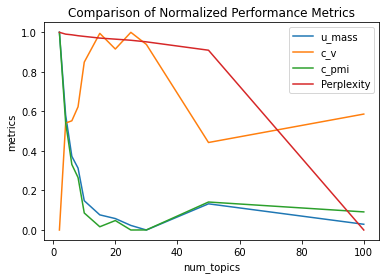

In [51]:
# Visualize metrics for given constant value of alpha and eta.
Evaluator.visualize(result_report)

#### Analyzing the Optimum LDA Topic Model - Manual Adjustments

In [46]:
# Define the optimum topic model with the optimum hyperparameters

opt_params_lda={
    'alpha': 'auto',
    'decay':0.51,
    'eta': 'auto',
    'num_topics': 15
}

from sklearn.pipeline import Pipeline
pipeline_lda = Pipeline(steps=[
    ('factor_extractor', FactorExtractor()),
    ('tokenization', WordTokenizer()),
    ('stopword_removal', StopwordRemover(named_entity_recognition, stopwords, NLTK_stopwords='include')),
    #('part_of_speech', PartOfSpeech(selection=['VERB','NOUN','ADJ'])),
    #('lemmatization', Lemmatizer()),
    #('stemming', Stemmer()),
    ('preprocessed_data', PreprocessedData()),
    ('bag_of_words', BagOfWords(no_below=2,no_above=0.95)),
    #('tf_idf', TfIdf()),
    ('latent_dirichlet_allocation', LDA(**opt_params_lda))
])

pipeline_lda.fit(df)

/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline(steps=[('factor_extractor',
                 <__main__.FactorExtractor object at 0x7f9319a46070>),
                ('tokenization',
                 <__main__.WordTokenizer object at 0x7f9319a46040>),
                ('stopword_removal',
                 <__main__.StopwordRemover object at 0x7f9319a465b0>),
                ('preprocessed_data',
                 <__main__.PreprocessedData object at 0x7f9319a46ca0>),
                ('bag_of_words', BagOfWords(no_above=0.95, no_below=2)),
                ('la...
                             [(74, 1), (75, 1), (86, 1)], [(87, 1), (88, 1)],
                             [(60, 1), (80, 1), (89, 1), (90, 1), (91, 1),
                              (92, 1)],
                             [(93, 1), (94, 1), (95, 1), (96, 1), (97, 1),
                              (98, 1)],
                             [(99, 1), (100, 1)],
                             [(88, 1), (101, 1), (102, 1), (103, 1), (104, 1)],
                             [(40, 1)

In [47]:
# Reference the topic model step of the pipeline as lda_topic_model
lda_topic_model = pipeline_lda['latent_dirichlet_allocation']

/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Use pyLDAvis for visualizing topics and relevance of words - ohne stemming
lda_topic_model.pyLDAvis()

/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7     -0.021500 -0.097993       1        1  8.761513
9     -0.217437  0.054271       2        1  7.721536
12    -0.056231 -0.062488       3        1  7.268910
0      0.020525  0.138379       4        1  6.978728
13    -0.174073  0.003166       5        1  6.861865
4      0.049693 -0.034693       6        1  6.843761
6      0.058523  0.036476       7        1  6.694960
8      0.026139 -0.136266       8        1  6.478187
14     0.070137 -0.051583       9        1  6.435503
10    -0.068386  0.083457      10        1  6.353435
3      0.116158  0.016250      11        1  6.293529
11     0.101116  0.137141      12        1  6.029085
5      0.072272 -0.078343      13        1  6.001380
1      0.039942  0.108116      14        1  5.753363
2     -0.016878 -0.115891      15        1  5.524243, topic_info=           Term        Freq       Total Category  logprob  loglift
77         best  419.000000  419.000000  Default  30.0000  30.0000
216         get  201.000000  201.000000  Default  29.0000  29.0000
330  difference   81.000000   81.000000  Default  28.0000  28.0000
74    questions   53.000000   53.000000  Default  27.0000  27.0000
40         make  100.000000  100.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
0         india   17.719733  189.366569  Topic15  -4.2326   0.5270
253    language    9.772165   36.444557  Topic15  -4.8278   1.5798
107         way   10.654855   88.735466  Topic15  -4.7413   0.7764
77         best   13.503680  419.750520  Topic15  -4.5043  -0.5407
16          one   10.473971  120.646254  Topic15  -4.7584   0.4521

[872 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1305      5  0.873782   abroad
2059     10  0.889110  academy
440       8  0.123259   access
440      15  0.739553   access
294       3  0.625073  account
...     ...       ...      ...
37        3  0.357556  youtube
37        9  0.051079  youtube
37       12  0.102159  youtube
37       13  0.459715  youtube
2185     15  0.820782       yr

[2070 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 13, 1, 14, 5, 7, 9, 15, 11, 4, 12, 6, 2, 3])

In [26]:
# Show LDA model attributes
# Output: Tuple of attributes

lda_attributes = ShowTopics.show_topicmodel_attributes(topic_model=lda_topic_model)

/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic Distribution for the Documents - Excerpt:
[[(0, 0.014287406), (1, 0.014289129), (2, 0.014287281), (3, 0.014287281), (4, 0.14694166), (5, 0.014287281), (6, 0.014287281), (7, 0.014288101), (8, 0.014287281), (9, 0.014287328), (10, 0.014287281), (11, 0.014287281), (12, 0.14733572), (13, 0.014287281), (14, 0.014287328), (15, 0.46283516), (16, 0.014287281), (17, 0.014287281), (18, 0.014287592), (19, 0.014287753)], [(0, 0.033334244), (1, 0.033334244), (2, 0.033334244), (3, 0.033334244), (4, 0.033339694), (5, 0.033334244), (6, 0.033334244), (7, 0.033335615), (8, 0.033334244), (9, 0.033334244), (10, 0.033334244), (11, 0.033334244), (12, 0.033334244), (13, 0.033334445), (14, 0.033334244), (15, 0.033334244), (16, 0.36664233), (17, 0.033334244), (18, 0.033334244), (19, 0.033334244)], [(0, 0.3098534), (1, 0.014286854), (2, 0.29404977), (3, 0.014286932), (4, 0.014287143), (5, 0.014288598), (6, 0.0142873665), (7, 0.014286854), (8, 0.014288844), (9, 0.014286854), (10, 0.014286969), (11, 0.014287

### Non Negative Matrix Factorization (NMF)

#### Define Pipeline and Optimize Hyperparameter Values 

In [ ]:
# Define possible hyperparameters.
model_params_nmf = {
    'nnegative_matrix_factorization__num_topics': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

# Define pipeline including selection of target data, preprocessing, (transformation), topic model.
# Note: Transformation done by the topic model class.

from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ('factor_extractor', FactorExtractor()),
    ('tokenization', WordTokenizer()),
    ('stopword_removal', StopwordRemover(stopwords, named_entity_recognition, NLTK_stopwords='include')),
    ('part_of_speech', PartOfSpeech(selection=['NOUN', 'VERB'])),
    ('lemmatization', Lemmatizer()),
    ('stemming', Stemmer()),
    ('preprocessed_data', PreprocessedData()),
    ('bag_of_words', BagOfWords(no_below=4, no_above=1)),
    ('tf_idf', TfIdf()),
    ('nnegative_matrix_factorization', NMF())
])

# Apply grid search for identifying optimal hyperparameter combinations.
result_report = GridSearch().fit(model_params=model_params_nmf, df = df, pipeline = pipeline)

In [ ]:
# Save data as csv-file in folder    
with open ('nmf_results.csv', 'w') as f:
    result_report.to_csv(f, header=False, sep=",")

In [31]:
# Relabel df from pipelinestep__hyperparameter to __hyperparameter including the above mentioned parameters
result_report.columns = ['num_topics', 'u_mass', 'c_v', 'c_pmi']
result_report

/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,num_topics,u_mass,c_v,c_pmi
0,2,-14.547154,0.630535,-11.629186
1,3,-14.573375,0.587921,-11.261532
2,4,-15.200317,0.604183,-11.568726
3,5,-16.906846,0.639998,-13.038390
4,6,-16.865141,0.623598,-12.864375
5,7,-17.076037,0.630392,-12.943320
6,8,-17.363125,0.637816,-13.057152
7,9,-17.433052,0.633887,-13.148035
8,10,-17.455662,0.635901,-13.037033
9,11,-17.592070,0.638470,-13.109027


/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


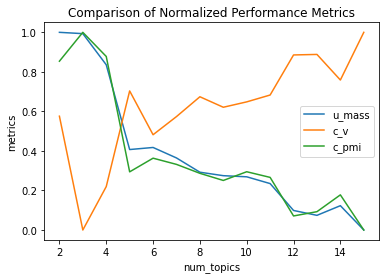

In [32]:
# Visualize metrics for given constant value of alpha and eta.
Evaluator.visualize(result_report, params=['u_mass', 'c_v', 'c_pmi'])

#### Analyzing the Optimum NMF Topic Model - Manual Adjustments

In [52]:
# Define the optimum topic model with the optimum hyperparameters

opt_params_nmf={
    'num_topics': 20,
}

from sklearn.pipeline import Pipeline
pipeline_nmf = Pipeline(steps=[
    ('factor_extractor', FactorExtractor()),
    ('tokenization', WordTokenizer()),
    ('stopword_removal', StopwordRemover(named_entity_recognition, stopwords, NLTK_stopwords='include')),
    #('part_of_speech', PartOfSpeech(selection=['NOUN','VERB'])),
    #('lemmatization', Lemmatizer()),
    #('stemming', Stemmer()),
    ('bag_of_words', BagOfWords(no_below=2,no_above=0.95)),
    #('tf_idf', TfIdf()),
    ('nnegative_matrix_factorization', NMF(**opt_params_nmf))
])

pipeline_nmf.fit(df)

/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline(steps=[('factor_extractor',
                 <__main__.FactorExtractor object at 0x7f93598e8880>),
                ('tokenization',
                 <__main__.WordTokenizer object at 0x7f93598e88b0>),
                ('stopword_removal',
                 <__main__.StopwordRemover object at 0x7f9399ade7c0>),
                ('bag_of_words', BagOfWords(no_above=0.95, no_below=2)),
                ('nnegative_matrix_factorization',
                 NMF(corpus=[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2)...
                             [(74, 1), (75, 1), (86, 1)], [(87, 1), (88, 1)],
                             [(60, 1), (80, 1), (89, 1), (90, 1), (91, 1),
                              (92, 1)],
                             [(93, 1), (94, 1), (95, 1), (96, 1), (97, 1),
                              (98, 1)],
                             [(99, 1), (100, 1)],
                             [(88, 1), (101, 1), (102, 1), (103, 1), (104, 1)],
                             [(40, 1), (77, 1), 

In [56]:
# Reference the topic model step of the pipeline as lda_topic_model
nmf_topic_model = pipeline_nmf['nnegative_matrix_factorization']

/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
# Show topic model attributes
# Output: Tuple of attributes

nmf_attributes = ShowTopics.show_topicmodel_attributes(topic_model=nmf_topic_model)

/Users/jonas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic Distribution for the Documents - Excerpt:
[[(5, 0.01366191131084392), (8, 0.9288712396520281), (14, 0.049594290687531385)], [(2, 0.06561948140168383), (7, 0.2170661534116298), (9, 0.10518595730252937), (12, 0.1046538899463426), (15, 0.40908449973530714), (18, 0.09839001820250733)], [(6, 0.04062865080244112), (10, 0.36875682333163967), (12, 0.29245396630346476), (14, 0.06073304479679901), (15, 0.19623282631971628), (17, 0.03944137743297796)], [(6, 0.6328464128483543), (11, 0.13197006663350758), (18, 0.23518352051813807)], [(5, 0.16723133854210642), (10, 0.7856444214658707), (16, 0.047124239992022865)], [(2, 0.5552073131470997), (5, 0.13259885607665395), (10, 0.10349680843300138), (13, 0.054276456766246296), (14, 0.15442056557699865)], [(1, 0.14641724329547498), (2, 0.18535739928600595), (8, 0.07556524875839882), (9, 0.026902910885202386), (17, 0.31485209385138213), (18, 0.24477591184767414)], [(1, 0.8091471166878588), (12, 0.08953782903501999), (18, 0.10131505427712129)], [(2, 0.1